In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [6]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [7]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [8]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


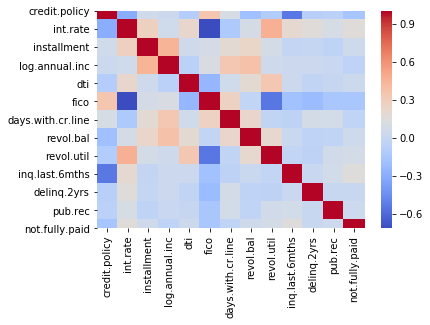

In [11]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [13]:
df.drop(['installment','log.annual.inc','days.with.cr.line','revol.bal','revol.util','delinq.2yrs','pub.rec'] ,axis = 1, inplace = True)

In [14]:
df.head()

,credit.policy,purpose,int.rate,dti,fico,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,19.48,737,0,0
1,1,credit_card,0.1071,14.29,707,0,0
2,1,debt_consolidation,0.1357,11.63,682,1,0
3,1,debt_consolidation,0.1008,8.10,712,1,0
4,1,credit_card,0.1426,14.97,667,0,0


In [15]:
df.corr()

,credit.policy,int.rate,dti,fico,inq.last.6mths,not.fully.paid
credit.policy,1.000000,-0.294089,-0.090901,0.348319,-0.535511,-0.158119
int.rate,-0.294089,1.000000,0.220006,-0.714821,0.202780,0.159552
dti,-0.090901,0.220006,1.000000,-0.241191,0.029189,0.037362
fico,0.348319,-0.714821,-0.241191,1.000000,-0.185293,-0.149666
inq.last.6mths,-0.535511,0.202780,0.029189,-0.185293,1.000000,0.149452
not.fully.paid,-0.158119,0.159552,0.037362,-0.149666,0.149452,1.000000


In [16]:
df.drop('dti' ,axis = 1, inplace = True)

In [17]:
df.corr()

,credit.policy,int.rate,fico,inq.last.6mths,not.fully.paid
credit.policy,1.000000,-0.294089,0.348319,-0.535511,-0.158119
int.rate,-0.294089,1.000000,-0.714821,0.202780,0.159552
fico,0.348319,-0.714821,1.000000,-0.185293,-0.149666
inq.last.6mths,-0.535511,0.202780,-0.185293,1.000000,0.149452
not.fully.paid,-0.158119,0.159552,-0.149666,0.149452,1.000000


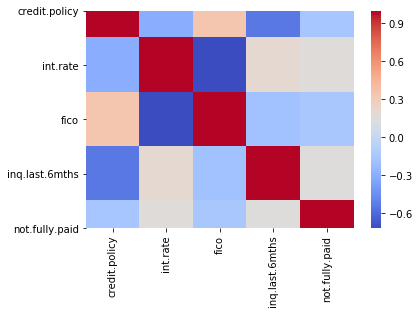

In [18]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [20]:
#fico and int rate ; credit policy and inq last 6 months are correlated . lets drop one from each pair
df.drop(['fico','inq.last.6mths'], axis = 1, inplace = True)

In [21]:
df.head()

,credit.policy,purpose,int.rate,not.fully.paid
0,1,debt_consolidation,0.1189,0
1,1,credit_card,0.1071,0
2,1,debt_consolidation,0.1357,0
3,1,debt_consolidation,0.1008,0
4,1,credit_card,0.1426,0


In [26]:
p = pd.get_dummies(df['purpose'], drop_first = True)

In [30]:
p

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [31]:
df

,credit.policy,purpose,int.rate,not.fully.paid
0,1,debt_consolidation,0.1189,0
1,1,credit_card,0.1071,0
2,1,debt_consolidation,0.1357,0
3,1,debt_consolidation,0.1008,0
4,1,credit_card,0.1426,0
...,...,...,...,...
9573,0,all_other,0.1461,1
9574,0,all_other,0.1253,1
9575,0,debt_consolidation,0.1071,1
9576,0,home_improvement,0.1600,1


In [32]:
df = pd.concat([p, df], axis = 1)

In [33]:
df.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,purpose,int.rate,not.fully.paid
0,0,1,0,0,0,0,1,debt_consolidation,0.1189,0
1,1,0,0,0,0,0,1,credit_card,0.1071,0
2,0,1,0,0,0,0,1,debt_consolidation,0.1357,0
3,0,1,0,0,0,0,1,debt_consolidation,0.1008,0
4,1,0,0,0,0,0,1,credit_card,0.1426,0


In [35]:
df.drop('purpose', axis = 1, inplace = True)

In [36]:
df.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,not.fully.paid
0,0,1,0,0,0,0,1,0.1189,0
1,1,0,0,0,0,0,1,0.1071,0
2,0,1,0,0,0,0,1,0.1357,0
3,0,1,0,0,0,0,1,0.1008,0
4,1,0,0,0,0,0,1,0.1426,0


In [37]:
df.corr()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,not.fully.paid
credit_card,1.000000,-0.326850,-0.075076,-0.103279,-0.085176,-0.102397,0.003216,-0.042109,-0.047136
debt_consolidation,-0.326850,1.000000,-0.161698,-0.222441,-0.183451,-0.220542,0.020193,0.123607,-0.017543
educational,-0.075076,-0.161698,1.000000,-0.051094,-0.042138,-0.050658,-0.031346,-0.019618,0.021609
home_improvement,-0.103279,-0.222441,-0.051094,1.000000,-0.057967,-0.069687,0.006036,-0.050697,0.007272
major_purchase,-0.085176,-0.183451,-0.042138,-0.057967,1.000000,-0.057472,0.024281,-0.068978,-0.028580
small_business,-0.102397,-0.220542,-0.050658,-0.069687,-0.057472,1.000000,-0.003511,0.151247,0.084460
credit.policy,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511,1.000000,-0.294089,-0.158119
int.rate,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247,-0.294089,1.000000,0.159552
not.fully.paid,-0.047136,-0.017543,0.021609,0.007272,-0.028580,0.084460,-0.158119,0.159552,1.000000


In [39]:
df.drop(['credit_card','debt_consolidation','educational','home_improvement','major_purchase','small_business'], axis = 1, inplace = True)

In [40]:
df.head()

,credit.policy,int.rate,not.fully.paid
0,1,0.1189,0
1,1,0.1071,0
2,1,0.1357,0
3,1,0.1008,0
4,1,0.1426,0


In [41]:
X = df[['credit.policy','int.rate']]

In [42]:
X.head()

,credit.policy,int.rate
0,1,0.1189
1,1,0.1071
2,1,0.1357
3,1,0.1008
4,1,0.1426


In [43]:
y = df['not.fully.paid']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6704, 2)
(6704,)
(2874, 2)
(2874,)


In [48]:
X

,credit.policy,int.rate
0,1,0.1189
1,1,0.1071
2,1,0.1357
3,1,0.1008
4,1,0.1426
...,...,...
9573,0,0.1461
9574,0,0.1253
9575,0,0.1071
9576,0,0.1600


In [ ]:
# we will do standard scaling on int rate only. Credit policy being categorical col - we will not do standard scaling on that

In [59]:
X1 = df[['int.rate']]

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()

In [60]:
scaled_arr = ss.fit_transform(X1)

In [61]:
scaled_arr

array([[-0.13931753],
       [-0.57886837],
       [ 0.48648368],
       ...,
       [-0.57886837],
       [ 1.39166043],
       [ 0.61685894]])

In [62]:
X1 = pd.DataFrame(scaled_arr, columns = X1.columns)

In [63]:
X1

,int.rate
0,-0.139318
1,-0.578868
2,0.486484
3,-0.813544
4,0.743509
...,...
9573,0.873884
9574,0.099083
9575,-0.578868
9576,1.391660


In [65]:
X.head()

,credit.policy,int.rate
0,1,0.1189
1,1,0.1071
2,1,0.1357
3,1,0.1008
4,1,0.1426


In [68]:
X.drop('int.rate', axis = 1, inplace = True)

KeyError: "['int.rate'] not found in axis"

In [69]:
X.head()

,credit.policy
0,1
1,1
2,1
3,1
4,1


In [70]:
X1.head()

,int.rate
0,-0.139318
1,-0.578868
2,0.486484
3,-0.813544
4,0.743509


In [72]:
X = pd.concat([X, X1], axis = 1)

In [73]:
X.head()

,credit.policy,int.rate
0,1,-0.139318
1,1,-0.578868
2,1,0.486484
3,1,-0.813544
4,1,0.743509


In [74]:
X.shape

(9578, 2)

In [75]:
y.shape

(9578,)

In [76]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model = DecisionTreeClassifier()

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_pred, y_test)

array([[2376,  447],
       [  34,   17]], dtype=int64)

In [87]:
(2376+17)/(2376+17+34+447)

0.8326374391092554